In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/sksin/OneDrive/Desktop/IC272/Assignment-1/landslide_data_miss.csv")
df

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.0000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.6930
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000.0,NaN
3,11-07-2018,t10,NaN,87.68657,1036.857463,963.00,8.8358,4000.0,6.0373
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.2385
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,NaN,58.69630,1026.797407,73577.25,5521.1231,47460.0,54.4222
941,22-11-2018,t9,15.52482,63.16312,1027.495248,65301.75,5521.1231,47460.0,54.5674
942,23-11-2018,t9,15.81560,59.21277,1029.318511,73534.50,5521.1231,47460.0,54.8794
943,24-11-2018,t9,16.58571,54.63571,1026.776357,72283.50,5521.1231,47460.0,55.0286


In [3]:
def linear_interpolation(l):
    #print(l) 
    #print(l.isna().sum())
    #print(l[2])

    if(pd.isna(l[0])):
        l[0]=np.mean(l)
    
    index=0

    #while((l.isna().sum())!=0):
    for i in range (len(l)):
        li=0
        ni=0
        # missing value found at index=index and this value=linear interpolation wala y
        if(pd.isna(l[index])):#as soon as nan value is found at index=index
            li=index-1        # we fix the li(last index)
            while(pd.isna(l[index])):#now we are searching for the next index which is not nan
                ni=index+1
                index=index+1
        
            index=li+1

            l[index]=l[li] + ((index-li)*(l[ni]-l[li]))/(ni-li)#nan at index has been changed
            
        index=index+1# move to the next index


In [7]:
linear_interpolation(df["moisture"])
linear_interpolation(df["humidity"])
linear_interpolation(df["lightavg"])
linear_interpolation(df["lightmax"])
linear_interpolation(df["pressure"])
linear_interpolation(df["rain"])
# # #linear_interpolation(df["stationid"])
linear_interpolation(df["temperature"])

In [8]:
df
df.isna().sum()

dates           0
stationid      19
temperature     0
humidity        0
pressure        0
rain            0
lightavg        0
lightmax        0
moisture        0
dtype: int64

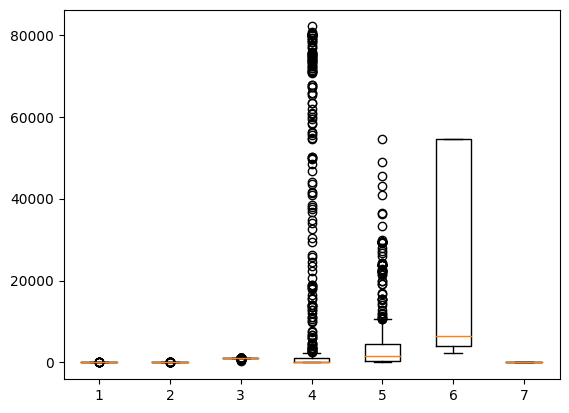

In [9]:
l=["temperature","humidity","pressure","rain","lightavg","lightmax","moisture"]
plt.boxplot(x=[df["temperature"],df["humidity"],df["pressure"],df["rain"],df["lightavg"],df["lightmax"],df["moisture"]])
plt.show()

In [ ]:
# def remove_outlier(i):
#     Q1 = df[i].quantile(0.25)
#     Q3 = df[i].quantile(0.75)
#     IQR=Q3-Q1
#     lower = Q1 - 1.5*IQR
#     upper = Q3 + 1.5*IQR
#     upper_array = np.where(df[i]>=upper)[0]
#     lower_array = np.where(df[i]<=lower)[0]

#     df.drop(index=upper_array, inplace=True)
#     df.drop(index=lower_array, inplace=True)

# for i in l:
#     remove_outlier(i)
        
# arr=np.sort(df["humidity"])
# q3=int((3*(len(arr)+1))/4)
# print(q3)



In [ ]:
for i in l:
    attr=np.sort(df[i])
    

    Q3=int((3*(len(attr)+1))/4)
    Q1=int((len(attr)+1)/4)
    IQR=Q3-Q1

    val=len(df[l])*[0]

    for j in len(attr):
        if (Q1-(1.5*IQR))<attr[j] and attr[j]<(Q3+(1.5*IQR)):
            val[j]=val[j]+1
    
    for i in len(attr):
        if (val[i]==1):
            



